# **Import Libraries**

In [ ]:
#import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

import zipfile
import shutil
import os

#import torch
#from torch import nn, optim
#from torchvision import datasets, transforms

import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

#device = ("cuda" if torch.cuda.is_available() else "cpu") # Use GPU or CPU for training

# Dataset Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#drive_dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset_prj1'

In [ ]:
BASIC_PATH = "/content/drive/MyDrive/Colab Notebooks/dataset_prj1"
IMG_PATH = os.path.join(BASIC_PATH,'Images')
FEATURE_PATH = os.path.join(BASIC_PATH,'list_attribute.txt')

In [ ]:
os.listdir(BASIC_PATH)

['list_attribute.txt', 'Images.zip', 'data_faces', 'Images', 'preprosess']

In [ ]:
images_list = os.listdir(IMG_PATH)
# load the data
data = pd.read_csv(os.path.join(BASIC_PATH, 'list_attribute.txt'), delimiter=r'\s+', skiprows=1).reset_index()# load data from file provided
data.rename(columns = {'index':'image_id'}, inplace = True)
data.replace(-1, 0, inplace=True)
data = data[data.image_id.isin(images_list)] # filter the data with available images only (5000 images)

In [ ]:
data.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
50,000051.jpg,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
51,000052.jpg,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
64,000065.jpg,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
165,000166.jpg,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
197,000198.jpg,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
df = data[['image_id','Male']]

In [ ]:
df.head()

,image_id,Male
50,000051.jpg,1
51,000052.jpg,1
64,000065.jpg,1
165,000166.jpg,1
197,000198.jpg,0


In [ ]:
len(df)

5000

In [ ]:
df.iloc[[0,1]]

,image_id,Male
50,000051.jpg,1
51,000052.jpg,1


In [ ]:
df.iloc[1]['Male']

1

In [ ]:
df.iloc[1]['image_id']

'000052.jpg'

In [ ]:
#buat direktory utk masing2 gender,1x aja
os.makedirs(os.path.join(BASIC_PATH,'preprosess'),exist_ok=True)

male_folder_path = os.path.join(BASIC_PATH,'preprosess','Male')
os.makedirs(male_folder_path, exist_ok=True)

female_folder_path = os.path.join(BASIC_PATH,'preprosess','Female')
os.makedirs(female_folder_path, exist_ok=True)

In [ ]:
preprosess_dataset = os.path.join(BASIC_PATH,'preprosess')
os.listdir(BASIC_PATH)

['list_attribute.txt', 'Images.zip', 'data_faces', 'Images', 'preprosess']

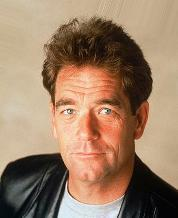

In [ ]:
#coba tampilkan gambar
import cv2
image = cv2.imread(os.path.join(IMG_PATH,(df.iloc[1]['image_id'])))
#plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
cv2_imshow(image)

In [ ]:
os.path.join(IMG_PATH,(df.iloc[1]['image_id']))

In [ ]:
#pindahkan gambar sesuai gender , 1x aja
for i in range(len(df)):
  if(df.iloc[i]['Male']==1):
    print('Male= ',df.iloc[i]['image_id'])
    shutil.copy((os.path.join(IMG_PATH,(df.iloc[i]['image_id']))), male_folder_path)
  else:
    print('Female= ',df.iloc[i]['image_id'])
    shutil.copy((os.path.join(IMG_PATH,(df.iloc[i]['image_id']))), female_folder_path)


Male=  000051.jpg
Male=  000052.jpg
Male=  000065.jpg
Male=  000166.jpg
Female=  000198.jpg
Female=  000201.jpg
Female=  000240.jpg
Male=  000282.jpg
Male=  000352.jpg
Male=  000409.jpg
Male=  000414.jpg
Male=  000439.jpg
Male=  000444.jpg
Male=  000474.jpg
Female=  000525.jpg
Male=  000545.jpg
Male=  000559.jpg
Male=  000572.jpg
Male=  000608.jpg
Female=  000653.jpg
Female=  000716.jpg
Male=  000771.jpg
Male=  000798.jpg
Female=  000810.jpg
Male=  000845.jpg
Male=  000858.jpg
Male=  000873.jpg
Female=  000922.jpg
Female=  000989.jpg
Male=  001140.jpg
Male=  001161.jpg
Female=  001218.jpg
Male=  001242.jpg
Female=  001248.jpg
Male=  001256.jpg
Male=  001270.jpg
Female=  001295.jpg
Male=  001401.jpg
Female=  001509.jpg
Male=  001519.jpg
Male=  001613.jpg
Female=  001637.jpg
Female=  001665.jpg
Female=  001708.jpg
Male=  001782.jpg
Male=  001800.jpg
Female=  001894.jpg
Female=  001921.jpg
Male=  001983.jpg
Female=  002085.jpg
Male=  002125.jpg
Female=  002134.jpg
Male=  002150.jpg
Female

## Train Val Split

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Generate dataset

image_size = (180,180)
batch_size = 32

train_ds,val_ds =tf.keras.utils.image_dataset_from_directory(
    preprosess_dataset,
    validation_split=0.2,
    subset='both',
    seed = 123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 5000 files belonging to 2 classes.
Using 4000 files for training.
Using 1000 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9755738


In [ ]:
img_height = 180
img_width = 180
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

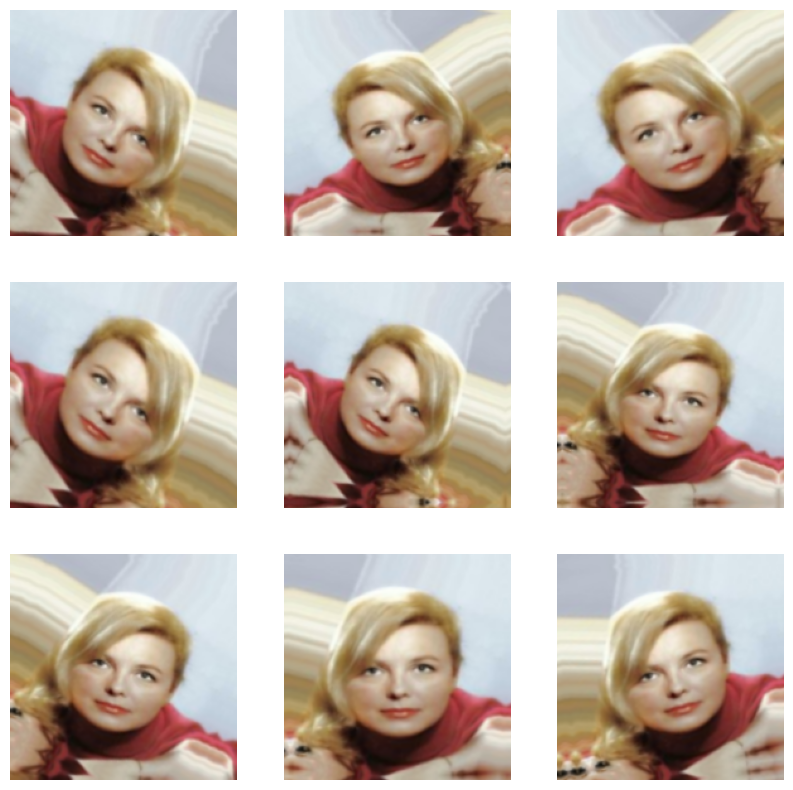

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(  #cara ke-2
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
def identity_block(X, f, filters, stage, block):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model1 = ResNet50(input_shape=(180, 180, 3))

In [ ]:
headModel = base_model1.output
headModel = Flatten()(headModel)
headModel = Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 1,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel) #softmax

In [ ]:
model = Model(inputs=base_model1.input, outputs=headModel)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 186, 186, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 90, 90, 64)           9472      ['zero_padding2d_2[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1[0][0]']         

In [ ]:
base_model1.load_weights(os.path.join(BASIC_PATH,"resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"))

In [ ]:
for layer in base_model1.layers:
    layer.trainable = False

In [ ]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7d56f70b72e0> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7d56f680b910> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d56f710fcd0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7d56f6584c70> False
<keras.src.layers.core.activation.Activation object at 0x7d56f67f44f0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7d56f6fcc430> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d56f6fcdde0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7d56f710f370> False
<keras.src.layers.core.activation.Activation object at 0x7d56f6fccb50> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d56f6fceb60> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7d56f6fce6e0> False
<keras.src.layers.core.activation.Activation object at 0

In [ ]:
opt = SGD(lr=1e-3, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
mc = ModelCheckpoint(os.path.join(BASIC_PATH,'best_model1.h5'), monitor='val_accuracy', mode='max',
    save_best_only=True)

In [ ]:
H = model.fit_generator(train_ds,validation_data=val_ds,epochs=100,verbose=1,callbacks=[mc,es])

Epoch 1/100


<ipython-input-89-e2556576cbdd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(train_ds,validation_data=val_ds,epochs=100,verbose=1,callbacks=[mc,es])


125/125 [==============================] - ETA: 0s - loss: 0.3463 - accuracy: 0.8495

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 42s 280ms/step - loss: 0.3463 - accuracy: 0.8495 - val_loss: 0.1892 - val_accuracy: 0.9290
Epoch 2/100
125/125 [==============================] - 32s 252ms/step - loss: 0.2306 - accuracy: 0.9038 - val_loss: 0.1987 - val_accuracy: 0.9080
Epoch 3/100
125/125 [==============================] - 30s 242ms/step - loss: 0.2093 - accuracy: 0.9140 - val_loss: 0.1898 - val_accuracy: 0.9180
Epoch 4/100
125/125 [==============================] - 34s 271ms/step - loss: 0.1929 - accuracy: 0.9155 - val_loss: 0.1678 - val_accuracy: 0.9390
Epoch 5/100
125/125 [==============================] - 38s 304ms/step - loss: 0.1816 - accuracy: 0.9280 - val_loss: 0.1766 - val_accuracy: 0.9420
Epoch 6/100
125/125 [==============================] - 31s 245ms/step - loss: 0.1708 - accuracy: 0.9327 - val_loss: 0.1547 - val_accuracy: 0.9380
Epoch 7/100
125/125 [==============================] - 30s 240ms/step - loss: 0.1639 - accuracy: 0.9360 - val_loss: 0.1721 - val_accurac

In [ ]:
loss, acc = model.evaluate(val_ds)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

In [ ]:
model_json = model.to_json()
with open((os.path.join(BASIC_PATH,"model.json")),"w") as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import model_from_json

def predict_(image_path):
    #Load the Model from Json File
    json_file = open((os.path.join(BASIC_PATH,'model.json')), 'r')
    model_json_c = json_file.read()
    json_file.close()
    model_c = model_from_json(model_json_c)
    #Load the weights
    model_c.load_weights((os.path.join(BASIC_PATH,"best_model.h5")))
    #Compile the model
    opt = SGD(lr=1e-4, momentum=0.9)
    model_c.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    #load the image you want to classify
    image = cv2.imread(image_path)
    image = cv2.resize(image, (180,180))
    cv2_imshow(image)
    #predict the image
    preds = model_c.predict(np.expand_dims(image, axis=0))[0]
    #predictions = model.predict(img_array)
    score = float(preds[0])
    print(f"This image is {100 * (1 - score):.2f}% female and {100 * score:.2f}% male.")



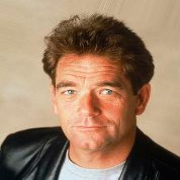

1/1 [==============================] - 1s 982ms/step
This image is 0.00% female and 100.00% male.


In [ ]:
predict_(os.path.join(IMG_PATH,(df.iloc[1]['image_id'])))

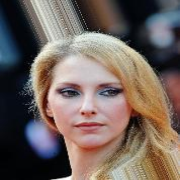

1/1 [==============================] - 1s 1s/step
This image is 99.69% female and 0.31% male.


In [ ]:
predict_(os.path.join(IMG_PATH,(df.iloc[5]['image_id'])))

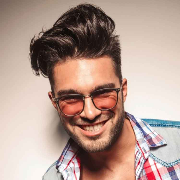

1/1 [==============================] - 1s 991ms/step
This image is 0.24% female and 99.76% male.


In [ ]:
predict_('pria2.jpg')

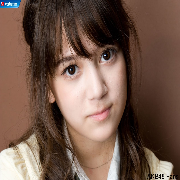

1/1 [==============================] - 2s 2s/step
This image is 98.68% female and 1.32% male.


In [ ]:
predict_('wanita14.jpg')

1/1 [==============================] - 0s 52ms/step
This image is 100.00% female and 0.00% male.


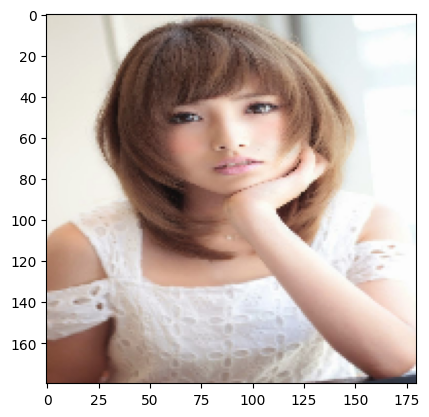

In [ ]:
img = keras.utils.load_img(
    "wanita13.jpg", target_size=image_size
)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% female and {100 * score:.2f}% male.")